In [1]:
#import the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#color for visualisations
my_color=sns.color_palette('Paired')

In [3]:
#import/upload the cleaned dataset for analysis
df=pd.read_csv('clean_data.csv')
df    # explore dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743,745,1024,1018,US,343,...,1587,45,13,0,0,0,0,0,0,0
1,2006,1,11,3,1053,1053,1313,1318,US,613,...,1587,27,19,0,0,0,0,0,0,0
2,2006,1,11,3,1915,1915,2110,2133,US,617,...,1587,4,11,0,0,0,0,0,0,0
3,2006,1,11,3,1753,1755,1925,1933,US,300,...,872,16,10,0,0,0,0,0,0,0
4,2006,1,11,3,824,832,1015,1015,US,765,...,872,27,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007,12,15,6,1558,1605,1749,1736,DL,58,...,403,14,17,0,0,0,0,0,0,0
14268924,2007,12,15,6,1902,1851,2110,2105,DL,59,...,1589,6,21,0,0,0,0,0,0,0
14268925,2007,12,15,6,1024,1025,1750,1735,DL,61,...,1946,14,19,0,0,0,0,15,0,0
14268926,2007,12,15,6,1353,1315,1658,1622,DL,62,...,732,11,14,0,0,0,0,0,0,36


In [4]:
# filtering out the data
# only delays  > 0 are considered for analysis
df=df[df['ArrDelay']>0]
df=df[df['DepDelay']>0]

# what is the best day of the week to fly, in order to minimise delays?


In [5]:
df['DayOfWeek'].value_counts() # count of elements under 'DayOfWeek' column

5    784913
4    735647
1    698689
7    667904
3    638044
2    589837
6    520288
Name: DayOfWeek, dtype: int64

In [6]:
# creating a dataframe with average values
# avgdelay_day = mean delay by day
avgdelay_day=df[['DayOfWeek','DepDelay','ArrDelay']].groupby(['DayOfWeek']).mean() 

# creating a new column 'Average Delay' that takes the average delays of 'DepDelay','ArrDelay' and sums it together and divides it by two getting a new average
avgdelay_day['Average Delay']=(avgdelay_day['ArrDelay'] + avgdelay_day['DepDelay'])/2

#arranging by 'Average Delay' in ascending order
avgdelay_day=avgdelay_day.sort_values(by='Average Delay',ascending=True)

avgdelay_day=avgdelay_day.reset_index()  #reseting the index of the dataframe
avgdelay_day  #explore dataframe

,DayOfWeek,DepDelay,ArrDelay,Average Delay
0,6,35.794975,36.042204,35.918589
1,2,36.817212,39.325610,38.071411
2,7,38.071518,39.750057,38.910787
3,3,38.001987,40.901610,39.451799
4,1,38.455075,40.469641,39.462358
5,5,39.441250,41.852456,40.646853
6,4,39.624418,43.036872,41.330645


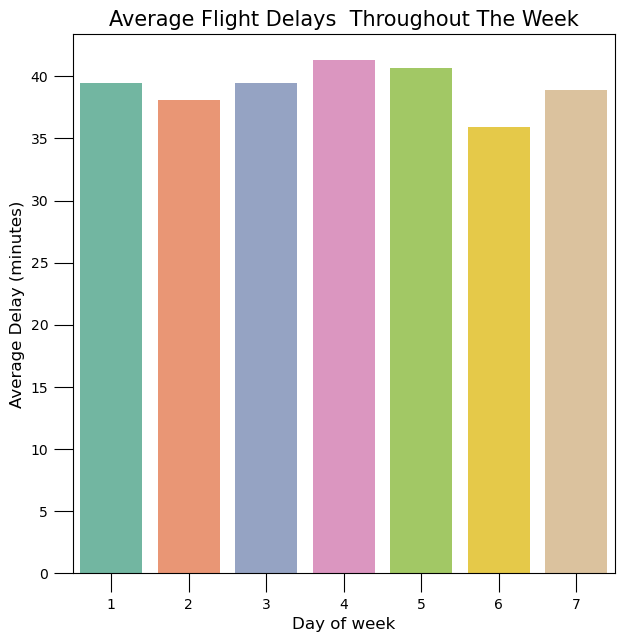

In [7]:
# the 6th day of the week is saturday it has the lowest average delay by taking into account both arrival and departure delays of flights
# Therefore Saturday is the best day to fly in order to minimise flight delays
##a barplot to show the avg delay in flight arrivals throughout the week
fig,ax=plt.subplots(1,1,figsize=(7,7))
sns.barplot(x='DayOfWeek', y='Average Delay' , data=avgdelay_day ,palette='Set2')
ax.set_xlabel('Day of week',size=12)
ax.set_ylabel('Average Delay (minutes)',size=12)
ax.set_title('Average Flight Delays  Throughout The Week',size=15)
ax.tick_params(axis='x',size=14)
ax.tick_params(axis='y',size=14)
plt.savefig('Average Flight Delays Throughout The Week.png')
plt.show()

# what is the best time of the year to fly, in order to minimise delays?



In [8]:
#include all required columns in a new dataframe
dt= df.loc[:,['Year', 'Month', 'DayofMonth', 'DayOfWeek','DepDelay','ArrDelay']]
dt

,Year,Month,DayofMonth,DayOfWeek,DepDelay,ArrDelay
6,2006,1,11,3,5,20
13,2006,1,11,3,2,14
14,2006,1,11,3,132,149
16,2006,1,11,3,8,25
31,2006,1,11,3,16,16
...,...,...,...,...,...,...
14268919,2007,12,15,6,45,24
14268920,2007,12,15,6,6,1
14268924,2007,12,15,6,11,5
14268926,2007,12,15,6,38,36


In [9]:
# creating a dataframe with average values
# avgdelay_month = mean delay by month
avgdelay_month=df[['Month','DepDelay','ArrDelay']].groupby(['Month']).mean()

#creating a new column 'Average Delay' that takes the average delays of 'DepDelay','ArrDelay' and sums it up and divide by 2
avgdelay_month['Total Average Delay']=(avgdelay_month['ArrDelay'] + avgdelay_month['DepDelay'])/2

#reset the index of the dataframe and explore the dataset
avgdelay_month=avgdelay_month.reset_index()
avgdelay_month

,Month,DepDelay,ArrDelay,Total Average Delay
0,1,36.903217,38.858856,37.881037
1,2,38.184256,40.488415,39.336335
2,3,37.778467,39.527578,38.653023
3,4,36.140453,37.824348,36.982400
4,5,35.182146,37.284722,36.233434
5,6,41.534677,44.571320,43.052999
6,7,40.889315,43.114687,42.002001
7,8,39.019221,41.198266,40.108744
8,9,36.599327,39.123740,37.861533
9,10,36.506594,39.556295,38.031444


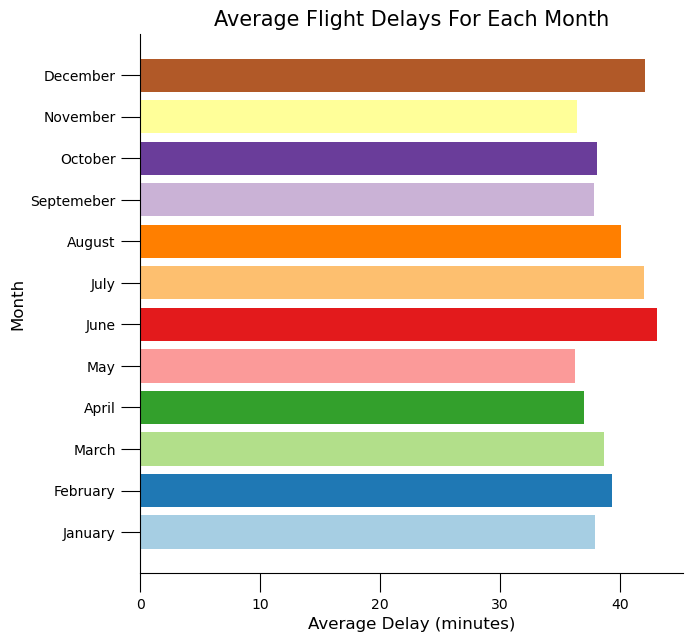

In [10]:
# showing  the above information in a bar plot
fig,ax=plt.subplots(1,1,figsize=(7,7))
ax.barh(["January","February","March","April","May","June","July","August","Septemeber","October","November","December"],  
          avgdelay_month.groupby(["Month"])["Total Average Delay"].mean(), 
          color = my_color)

ax.set_xlabel('Average Delay (minutes)',size=12)
ax.set_ylabel('Month',size=12)
ax.set_title('Average Flight Delays For Each Month',size=15)
ax.tick_params(axis='x',size=14)
ax.tick_params(axis='y',size=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


plt.savefig('Average Flight Delays For Each Month.png')
plt.show()

In [11]:
# analysing the best time to fly by quarterwise
#defining the required conditions for application on the dataframe avgdelay_month
#we identify months of the year to a respective quarter
def condition (x):
    if x<4:
        return 'Q1'
    if x>=4 and x<7:
        return 'Q2'
    if x>=7 and x<10:
        return 'Q3'
    if x>=10 and x<13:
        return 'Q4'
avgdelay_month['Quarter Of The Year']=avgdelay_month['Month'].apply(lambda x : condition(x))

In [12]:
avgdelay_month

,Month,DepDelay,ArrDelay,Total Average Delay,Quarter Of The Year
0,1,36.903217,38.858856,37.881037,Q1
1,2,38.184256,40.488415,39.336335,Q1
2,3,37.778467,39.527578,38.653023,Q1
3,4,36.140453,37.824348,36.982400,Q2
4,5,35.182146,37.284722,36.233434,Q2
5,6,41.534677,44.571320,43.052999,Q2
6,7,40.889315,43.114687,42.002001,Q3
7,8,39.019221,41.198266,40.108744,Q3
8,9,36.599327,39.123740,37.861533,Q3
9,10,36.506594,39.556295,38.031444,Q4


In [13]:
# creating a new dataset with just the quarter of the year and delay for each quarter 
avgdelay_quarter=avgdelay_month[['Quarter Of The Year','Total Average Delay']].groupby('Quarter Of The Year').mean().reset_index()

In [14]:
avgdelay_quarter # explore dataframe

,Quarter Of The Year,Total Average Delay
0,Q1,38.623465
1,Q2,38.756278
2,Q3,39.990759
3,Q4,38.819891


In [15]:

# Quarter 1 has the lowest average delay  when taking total delay ( sum of average DepDelay and average ARRDelay divided by 2)

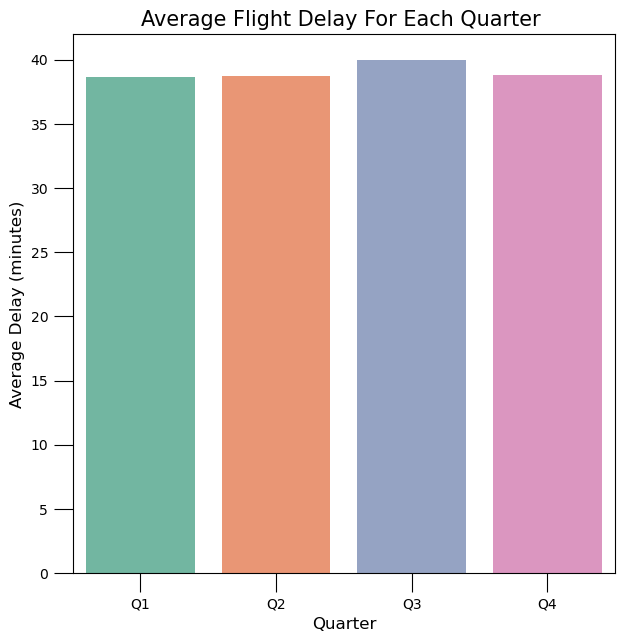

In [16]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
sns.barplot(x='Quarter Of The Year', y='Total Average Delay' , data=avgdelay_quarter,palette='Set2')
ax.set_xlabel('Quarter',size=12)
ax.set_ylabel('Average Delay (minutes)',size=12)
ax.set_title('Average Flight Delay For Each Quarter ',size=15)
ax.tick_params(axis='x',size=14)
ax.tick_params(axis='y',size=14)
plt.savefig('Average Flight Delay For Each Quarter.png')
plt.show()

 # what is the best time of the day to fly, in order to minimise flight delays?

In [17]:
# include all columns of interest into a new dataframe
ds= df.loc[:,['Year', 'Month', 'DayofMonth', 'DayOfWeek','DepTime','ArrDelay','DepDelay']]
ds


,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay,DepDelay
6,2006,1,11,3,825,20,5
13,2006,1,11,3,1342,14,2
14,2006,1,11,3,1752,149,132
16,2006,1,11,3,1153,25,8
31,2006,1,11,3,1851,16,16
...,...,...,...,...,...,...,...
14268919,2007,12,15,6,1940,24,45
14268920,2007,12,15,6,1341,1,6
14268924,2007,12,15,6,1902,5,11
14268926,2007,12,15,6,1353,36,38


In [18]:
#creating timeframes with regard to DepTime
def condition (x):
    if x<400:
        return '12am-4am'
    elif x>=400 and x<800:
        return '4am-8am'
    elif x>=800 and x<1200:
        return '8am-12pm'
    elif x>=1200 and x<1600:
        return '12pm-4pm'
    elif x>=1600 and x<2000:
        return '4pm-8pm'
    elif x>=2000 and x<2400:
        return '8pm-12am'
        
#creating timeframes with regard to DepTime    

In [19]:
ds['Timeframe']=ds['DepTime'].apply(lambda x : condition(x))  # we apply the above defined condition on 'DepTime' and obtain 'Timeframe'

In [20]:
ds.head() #explore dataframe

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay,DepDelay,Timeframe
6,2006,1,11,3,825,20,5,8am-12pm
13,2006,1,11,3,1342,14,2,12pm-4pm
14,2006,1,11,3,1752,149,132,4pm-8pm
16,2006,1,11,3,1153,25,8,8am-12pm
31,2006,1,11,3,1851,16,16,4pm-8pm


In [21]:
ds=ds[['Timeframe','DepDelay','ArrDelay']].groupby(['Timeframe']).mean()  #creating a new dataframe with 'Timeframe','DepDelay','ArrDelay' and grouping by 'Timeframe'

In [22]:
ds.head() #explore dataframe

,DepDelay,ArrDelay
Timeframe,,
12am-4am,113.881073,109.972640
12pm-4pm,32.871590,35.304224
4am-8am,17.742700,22.090239
4pm-8pm,40.051266,42.720095
8am-12pm,27.194735,30.119577


In [23]:
#creating a new column that sums both mean 'ArrDelay' and 'DepDelay' and divides it by two
ds['Total_Delay']=(ds['ArrDelay'] + ds['DepDelay'])/2
ds=ds[ds['Total_Delay']>0] # we only consider flight delays > 0 mins

In [24]:
ds=ds.reset_index()
ds

,Timeframe,DepDelay,ArrDelay,Total_Delay
0,12am-4am,113.881073,109.972640,111.926856
1,12pm-4pm,32.871590,35.304224,34.087907
2,4am-8am,17.742700,22.090239,19.916470
3,4pm-8pm,40.051266,42.720095,41.385680
4,8am-12pm,27.194735,30.119577,28.657156
5,8pm-12am,59.016800,58.964379,58.990589


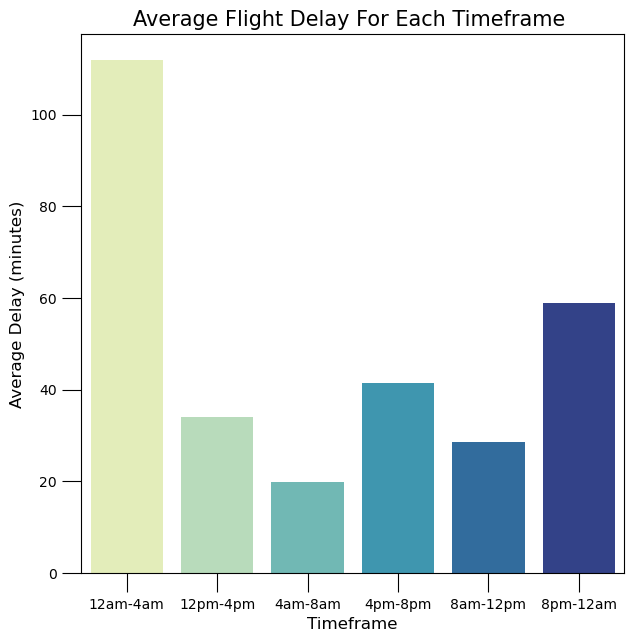

In [27]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
sns.barplot(x='Timeframe', y='Total_Delay' , data=ds,palette="YlGnBu")
ax.set_xlabel('Timeframe',size=12)
ax.set_ylabel('Average Delay (minutes)',size=12)
ax.set_title('Average Flight Delay For Each Timeframe ',size=15)
ax.tick_params(axis='x',size=14)
ax.tick_params(axis='y',size=14)
plt.savefig('Average Flight Delay For Each Timeframe.png')
plt.show()

In [26]:
# therefore 4am to 8am  timeframe is the best time of the day to fly